# Exercise 6: Time series analysis and stochastic modelling 

**Name: Bikas Chandra Bhattarai**

**Date: 2015/10/12**

### Question 1: Time series analysis

The annual mean runoff data in a station are given in the file Qyearlymean.txt.

1. Investigate if there is a trend using linear regression method  for $\alpha$ =10%.
2. If the trend is significant, remove the trend from the data series.
3. Calculate and plot the autocorrelation $\rho_k$ and 95% confidence limits for time shifts, k, up to 5 years. Check up to which time lag is the $\rho_k$ significant. 

#### Test for significance of b

$X_i = a + bT_i$

$H_o$: b = 0; $H_a$: $b \neq 0$

Test statistic $t = \frac{b-o}{s_b}$

$H_o$ is rejected if $|t| \geq t_{1-\alpha/2,n-2}$ i.e. b is significantally different from zero.

Where

$s_b = \sqrt{\frac{S^2}{\sum_{t=1}^{n} (T_t - \bar{T})^2}}$ and $S^2 = \frac{\sum_{i=1}^{n}(\chi_i - \hat{\chi}_i)^2}{n-2}$ $ \ \ \ \ $ (1)

The equation for autocorrelation coefficient, $\rho_k$ is given as

$\rho_k = \frac{Cov(X_t,X_{t+k})}{Var(X_t)} = \frac{\frac{1}{n-1}\sum_{t=1}^{n-k}(X_t - \bar{X})(X_{t+k}-\bar{X})}{\frac{1}{n-1}\sum_{t=1}^{n}(X_t-\bar{X})^2}$ $\ \ \ \ $ (2)

#### Test the significance of $\rho_k$

$l = \frac{(-1-z_{1-\alpha/2}\sqrt{n-2})}{n-1}$

and 

$u = \frac{(-1+z_{1-\alpha/2}\sqrt{n-2})}{n-1}$

$H_o$: $\rho_k = 0$; $H_a$: $\rho_k \neq 0$

If the calculated $\rho_k$ falls outside these confidence limits, then the hypothesis is rejected, i.e., $\rho_k$ is significant for significant level $\alpha$ and time lag k.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
from pandas import Series
import statsmodels.tsa.stattools

In [3]:
q=pd.read_table('Qyearlymean.txt')
q.columns = ([u'YEAR', u'T', u'discharge'])
discharge = q['discharge']
print q.head(3)
print len(q)

   YEAR  T  discharge
0  1940  1      398.0
1  1941  2      429.1
2  1942  3      690.2
51


In [4]:
q= pd.read_table('Qyearlymean.txt')
# create a fitted model between discharge as dependent variable and time (T) as indipendent variable 
fd = smf.ols(formula='discharge ~ T', data= q).fit()
#print summary statistics
print(fd.summary())

                            OLS Regression Results                            
Dep. Variable:              discharge   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.942
Date:                Tue, 13 Oct 2015   Prob (F-statistic):             0.0926
Time:                        09:41:14   Log-Likelihood:                -319.41
No. Observations:                  51   AIC:                             642.8
Df Residuals:                      49   BIC:                             646.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    491.2333     36.817     13.343      0.0

So the regression model becomes:

$X_t = a +bT_t = 491.23 + 2.11 * T_t$

Now formulating the test hypothesis for the coefficients to test wheather the coefficients are significantly different or not and the test hypothesis can be formulated as given below:

$H_0 : b = 0$

$H_a : b \neq 0$

If the $|t|> t_{critical}$, then $H_0$ is rejected

From above table $|t|$ = 1.715

In [5]:
# Obtaining the value of 't' from t-table using the python function at alpha = 10, degree of freedom = 49
round(scipy.stats.t.ppf(0.90,len(q)-2),3)

1.299

From the t-table calculation $t_{critical} = t_{1-\frac{\alpha }{2}}; n-2$ = 1.299 (for $\alpha$ = 10%)

**Conclusion:**
From the analysis, $|t|$ value is greater than $t_{critical}$ so $H_0$ is rejected and concluded that, there is a trend.

**2. If the trend is significant, remove the trend from the data series.**

To remove the trend, the difference between observed values and estimated values, the error, is calculated. The error is always without trend. To get the time series of discharge without trend, interception and each error value is added.



y = 2.11x + 491.233
y_without_trend = -0.00x + 491.233


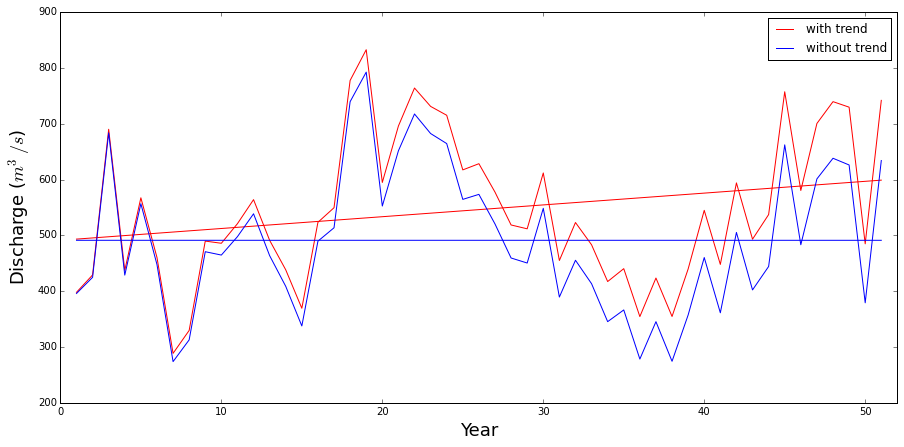

In [6]:
# Defining x-axis
year = q['T']
#creating plot
fig, ax = plt.subplots(figsize=(15,7))

#creating linear fit 
fit = np.polyfit(year, discharge, deg=1)

#plotting trend line to the figure
ax.plot(year, fit[0] * year + fit[1], color='red')
ax.plot(year, discharge,color='red', label = 'with trend')
plt.legend()
#setting the font size for x and y-axis
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

#priting the linear equation of fit
print 'y = %.2fx + %.3f'%(fit[0],fit[1])

#plot for without trend
#creating x-axis for the data with out trend
x1 = year
#date = range(1940, 1991,1)
#removing the trend from data ( compendium 139, 2013)
y1 = 2.114*x1
without_trend = discharge-y1
ax.plot(x1,without_trend,label='without trend')
plt.legend()

#creating linear fit for non trended data series
fit = np.polyfit(x1, without_trend, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='blue')
ax.set_xlim([0,52])
# display the equation for data without trend
print 'y_without_trend = %.2fx + %.3f'%(fit[0],fit[1])

plt.ylabel('Discharge ($m^3/s$)', fontsize =18)
plt.xlabel('Year',fontsize=18)
plt.show()

**3) Calculate and plot the autocorrelation $\rho_k$ and 95% confidence limits for time shifts, k, up to 5 years. Check up to which time lag is the $\rho_k$ significant.** 

**Solution:**The equation for autocorrelation coefficient, $\rho_k$ is given as

$\rho_k = \frac{Cov(X_t,X_{t+k})}{Var(X_t)} = \frac{\frac{1}{n-1}\sum_{t=1}^{n-k}(X_t - \bar{X})(X_{t+k}-\bar{X})}{\frac{1}{n-1}\sum_{t=1}^{n}(X_t-\bar{X})^2}$ $\ \ \ \ $ 
Which is given by the python function : **statsmodels.tsa.stattools.acf(Series, nlags= Timelag)** is used in this calculation. Conficence intervals are calculated by using the formula given below:

$l = \frac{(-1-z_{1-\alpha/2}\sqrt{n-2})}{n-1}$

and 

$u = \frac{(-1+z_{1-\alpha/2}\sqrt{n-2})}{n-1}$

$H_o$: $\rho_k = 0$; $H_a$: $\rho_k \neq 0$

If the calculated $\rho_k$ falls outside these confidence limits, then the hypothesis is rejected, i.e., $\rho_k$ is significant for significant level $\alpha$ and time lag k.

In [7]:
# generating series of total number of data which is equivalent to n in the confidence interval formula 
v = pd.Series(range(51 ,45, -1)) 
# Defining the time lag as index in the dataframe
index = range(0 ,6)
# creating dataframe
auto = pd.DataFrame( index = index)
# assigning the title to index as time lag
auto.columns.name = 'Time lag'
#calculating autocorrelation by using the function from pytohn where nlags is the all time shift or time lag
auto['autocorr (pk)'] = Series(statsmodels.tsa.stattools.acf(without_trend, nlags=5))
# calculating lower confidence interval where 1.96 is the value from normal distribution table at 5% level of significance
auto['CI-lower'] = (-1-1.96*np.sqrt(v-2))/(v-1)
# calculating upper confidence interval
auto['CI-upper'] = (-1+1.96*np.sqrt(v-2))/(v-1)
# displaying the data
auto

Time lag,autocorr (pk),CI-lower,CI-upper
0,1.000000,-0.294400,0.254400
1,0.527878,-0.297536,0.256720
2,0.453294,-0.300773,0.259106
3,0.386475,-0.304114,0.261561
4,0.194384,-0.307567,0.264089
5,0.159846,-0.311137,0.266693


**Conclustion:** From above calculation $H_0 : p_k = 0$ is rejected up to time lag of 3 years. This means the autocorrelation coefficient is significant for $\alpha = $5% up to 3 years of time lag. The autocorrelation for time lag up to 5 years together with limits for confidence interval with 5% leel of significance is given below:

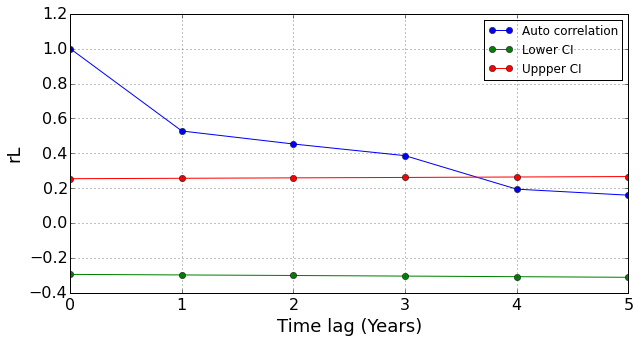

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(auto, marker='o')
plt.grid()
plt.legend(['Auto correlation', 'Lower CI' , 'Uppper CI'])
plt.ylabel('rL', fontsize =18)
plt.xlabel('Time lag (Years)',fontsize=18)
plt.show()

In python there is a inbuild function instide **statsmodels.graphics.tsaplots** called **plot_acf** to calculate and plot the auto-correlation with 95% significance level. The plot given below is plotted by using the plot_acf function where area under the shaded region is the confidence intervals.

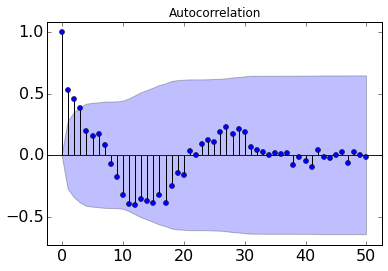

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(without_trend)
plt.show()

### Question 2: Stochastic models for stationary time series

Fit the first order Markov model for annual data (after the removal of trend if there is any)

$X_{t+1} = \mu + \beta(1)(X_t-\mu) + \epsilon_{t+1}$ $ \ \ \ \  $ (3)

Parameter estimation:

$\hat{\beta}_1 = \rho_1$ where $\rho_1$ is calculated using equation (2).

$\hat{\sigma}_{\epsilon}^2 = \sigma_x^2(1-\hat{\beta}_1^2)$ where $\sigma_x^2 = \frac{\sum_{i=1}^{n}(\chi_i - \bar{\chi}_i)^2}{n-1}$

and

$\hat{\mu} = \bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$

equation (3) becomes

$x_t = \hat{\mu}_x + \hat{\beta}_1(x_{t-1}-\hat{\mu}_x + z_t\sigma_x)\sqrt{1-\hat{\beta}_1^2}$ $\ \ \ \ $ (4)

#### Procedure of using equation (4):

1. Estimate $\mu_x$, $\sigma_x$, and $\beta_1$ and substitute them in (4)
2. Generate random $z_t$ series which is from a N(0,1) distribution. **N_yrs = 1991-1960+1**
**random.standard_normal((N_yrs,))**
3. Use the 1959’s value as initial value and simulate for the period 1960-1991
4. Compare the simulated time series with the observed time series. Plot two time series in the same graph, calculate and compare the statistics of the two series, i.e. mean, standard deviation, $\rho_1$ and $\rho_2$, etc.,
5. Use AR(1) model to simulate  100 samples, each having 33 years, calculate the mean values of the statistics (average, standard deviation, r1) from the 100 samples and compare them with the statistics calculated from observed 33 years data series

Note that in step (4), one simulation sample is compared with the observed data, while in step (5) the mean values of 100 samples are compared with the observed values.

#### Solution:

In [10]:
#Calculating the different statistics for the data:
#Defining the dataframe
frame= pd.DataFrame()
#counting the number of data
n = len(without_trend)
#calculating mean
mean = 491.22
frame['no_obs'] = Series(len(without_trend))
frame['mean']= np.mean(without_trend).round(2)
frame['std'] = (np.sqrt(sum((without_trend-mean)**2)/(n-1))).round(2)
#Displaying the basic statistics of data with out trend
frame

,no_obs,mean,std
0,51,491.22,128.23


*Now Fitting of first order Markov model for annual data after trend is removed. Equation (4) to simulate discharge.Autocorrelation for time lag of 1 is calculated by using the python function:*

In [11]:
#calculating the autocorrelation
auto_1 = statsmodels.tsa.stattools.acf(without_trend, nlags=1)
#converting the array data in to series
auto_1 = Series(auto_1[1,]).round(3)
print auto_1

0    0.528
dtype: float64


Here, the autocorrelation with time lag of 1 year is found to be 0.528

$\beta_1 = \rho_1 = auto_1 = 0.528$

$mean = \bar{x} = 491.22$

$std = \sigma^{2}_x = 128.23$

and $z_t$ is series generated from random normal distribution: N(0,1). The initial value for $X_{t-1}$ is selected as the 1959 value i.e 552.63 $m^3/s$.

In [12]:
mean = 491.22
std = 128.23
#Selecting the data series 1959 to 1990
no_trend = without_trend[19:]
#generating normally distributed random data series 
z= np.random.normal(0, 1, 32)
# Simulating the discharge by using equation (4)
simulated = pd.DataFrame(mean+(0.557*(no_trend -mean))+(z*std*(np.sqrt(1-0.557**2))))

calculating the auto-correlation upto 2 year time lag for observed and simulated datasets.

In [13]:
auto_2_obs = pd.DataFrame(statsmodels.tsa.stattools.acf(no_trend, nlags=2))[1:]
print auto_2_obs.T

          1         2
0  0.595307  0.614706


In [14]:
auto_2_sim = pd.DataFrame(statsmodels.tsa.stattools.acf(simulated, nlags=2))[1:]
print auto_2_sim.T

          1         2
0  0.252234  0.267889


Calculating other statistics and making the dataframe

In [15]:
index = ['Observed','Simulated']
statistic = pd.DataFrame(index = index)
statistics = pd.DataFrame({'Auto_1': [0.595, 0.128], 'Auto_2': [0.6147, 0.0735]},index=(index))
statistics['Mean'] = round(no_trend.mean(),2),round(simulated.mean(),2)
statistics['std'] = round(no_trend.std(),2), round(simulated.std(),2)
statistics['median'] = round(no_trend.median(),2), round(simulated.median(),2)
statistics

,Auto_1,Auto_2,Mean,std,median
Observed,0.595,0.6147,494.06,126.30,471.80
Simulated,0.128,0.0735,511.54,110.66,511.32


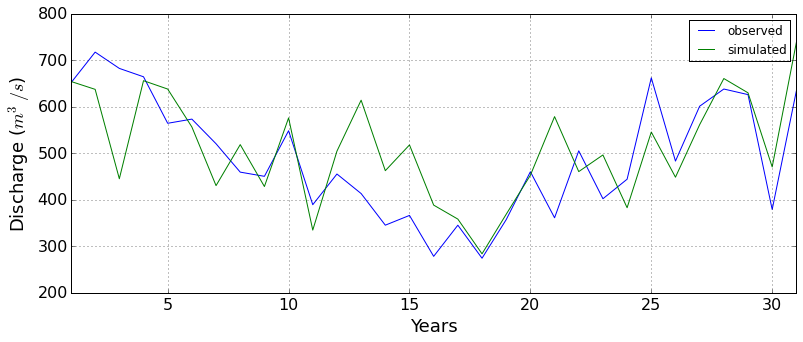

In [16]:
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(no_trend, label='observed')
ax.plot(simulated, label='simulated')
plt.grid()
ax.set_xlim([1 ,31])
plt.legend()
plt.xlabel('Years',fontsize =18)
plt.ylabel('Discharge ($m^3/s$)',fontsize =18)
plt.show()

**Conclusion:**
The statistics for observed and modelled time series (1960 -1990) is in above table. And aslo it is clear from the plot that the variation between the observed and simulated data series is large. Comparision shows that the Markov medeled time series is a more ramdom series as is expected when including the random z values from a normal distribution in the Markov model. Simulated times series has lower mean, and lower standard deviation then that of the observed series. And the value of mean and standard deviation changes everytimes after the model because of random number.

*5 Use AR(1) model to simulate  100 samples, each having 33 years, calculate the mean values of the statistics (average, standard deviation, r1) from the 100 samples and compare them with the statistics calculated from observed 33 years data series*

In [395]:
#Defining the dataframe
df = pd.DataFrame()
#defining the function for n times model run
def repeat_fun(times, f, args):
    for i in range(times): f(i,args)

def f(iteration,df):
    g = np.random.normal(0, 1, 32)
    mm = Series(no_trend)
    x = 491.22+(0.557*(mm -491.22))+(g*128.23*(np.sqrt(1-0.557**2)))
    df[iteration] = x

repeat_fun(100,f,df)
#Dataframe with 100 columns and 31 rows will be obtained by printing df.
#calculating the mean for 100 times run datasets
Simulated_100 =df.mean(axis=1)

Calculating auto-correlation up to 2 year time lag for mean which is calculated from 100 years run datasets.

In [397]:
auto_2_100_sim = pd.DataFrame(statsmodels.tsa.stattools.acf(Simulated_100, nlags=2))[1:]
print auto_2_sim.T

          1         2
0  0.219762  0.432154


Calculating and comparing the different statistics for the mean of 100 times run and observed data without trend. 

In [398]:
ind = ['Observed','Simulated']
simulated_100 = pd.DataFrame(index = ind)
simulated_100 = pd.DataFrame({'Auto_1': [0.595, 0.128], 'Auto_2': [0.219, 0.432]},index=(index))
simulated_100['Mean'] = round(no_trend.mean(),2),round(Simulated_100.mean(),2)
simulated_100['std'] = round(no_trend.std(),2), round(Simulated_100.std(),2)
simulated_100['median'] = round(no_trend.median(),2), round(Simulated_100.median(),2)
simulated_100

,Auto_1,Auto_2,Mean,std,median
Observed,0.595,0.219,494.06,126.30,471.80
Simulated,0.128,0.432,491.35,70.28,476.09


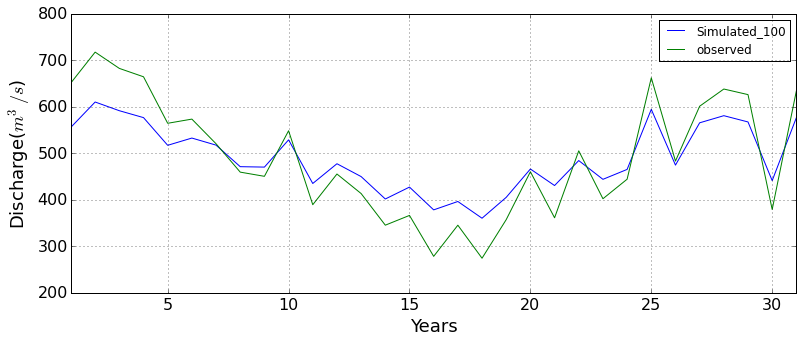

In [401]:
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(Simulated_100,label='Simulated_100')
ax.plot(no_trend, label='observed')
plt.grid()
ax.set_xlim([1 ,31])
plt.ylabel('Discharge($m^3/s$)', fontsize =18)
plt.xlabel('Years',fontsize=18)
plt.legend()
plt.show()

**Conclusion** mean and standard deviation for mean simulated discharge is lower then that of observed one. On the basis of standard deviation we can say that the variation in simulated data sets is comperatively less then that of observed datasets.

### Question 3: Stochastic model for non-stationary time series

Adapt a stochastic model to monthly discharge COLUMBIA_M1.txt.

Thomas-Fiering is a generalization of the first order Markov model. 
In general for the stochastic models (MA, AR, ARMA) stationarity is assumed. For example, the first order Markov model assumes stationarity in the first three moments. However, there are generalizations of these models that account for non-stationarity. For data sets which are seasonally non-stationary, you can use Thomas-Fiering.

1. Fit the Thomas-Fiering Model to the data and simulate the monthly discharge from January 1949 to December 1975 using the value of December 1948 as the initial value. Plot the simulated and observed data on the same graph and compare the statistics of the two data series
2. Simulate the 100-year discharge series from 1976 to 2075 using the value of December 1975 as initial value and compare the statistics of the simulated data series with the observed data series.

The Thomas-Fiering Model is given as:

$\hat{q}_{j+1,i} = \bar{q}_{j+1} + b_j(q_{j,i}- \bar{q_j}) + z_{j+1,i}\cdot s_{j+1}\sqrt{1-r_j^2}$ $\ \ \ \ $ (1)

Where i = year, j = month, and z is a random series with N(0, 1).  

#### Calculation procedure:

(a) The mean flow: $\bar{q}_j = \frac{1}{n}\sum_i q_{j,i}$, $\ \ \ \ $ where $i = \{j, 12+j,24+j,\cdots\}$

(b) The standard deviation: $S_j = \sqrt{\frac{\sum_i (q_{j,i}-\bar{q}_j)^2}{n-1}}$

(c) the correlation coefficient with flow in the next month,

$r_j = \frac{\sum_i (q_{j,i}-\bar{q}_j)(q_{j+1,i}-\bar{q}_{j+1})}{\sqrt{\sum_i (q_{j,i}-\bar{q}_j)^2\sum_i(q_{j+1,i}-\bar{q}_{j+1})^2}}$

(d) the slope of the regression equation relating the month’s flow to flow in the preceding month:

$b_j = r_j\frac{S_{j+1}}{S_j}$


**Solution**

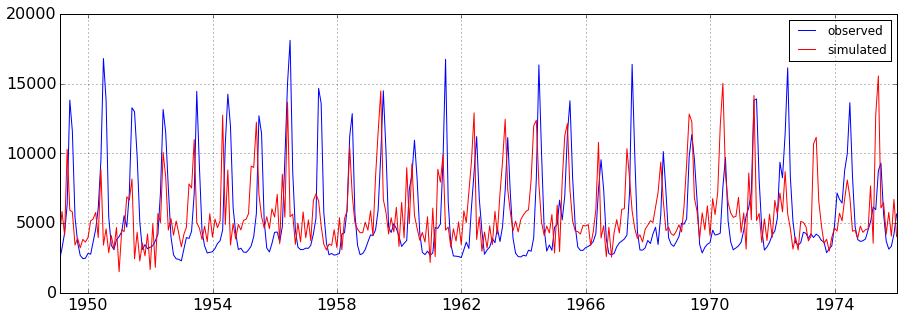

In [18]:

def thomas_fiering(q_hist, q_init, j_init, period):
    """ Thomas Fiering Model """
    
    q = q_hist

    months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

    months1 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1]
    
    # create a random generator, note we have to call this '()' and take the
    # first element returned [0]... so in use it is Z()[0]
    Z = np.random.randn

    # get the mean monthly discharges for the j months
    q_mean_j = [q[q.index.month == i].discharge.mean() for i in months]
        
    # get the mean monthly discharges for the j+1 months
    q_mean_j1 = [q[q.index.month == i].discharge.mean() for i in months1]
    
    # do the same for standard deviation
    sj = [q[q.index.month == i].discharge.std() for i in months]
        
    sj1 = [q[q.index.month == i].discharge.std() for i in months1]
    
    # calculate the pearson r using built-ins
    rj = [pearsonr(q[q.index.month == i].discharge,
                   q[q.index.month == j].discharge)[0] for i, j in zip(months, months1)]

    # the model, not vectorized. assumes each of the variables above are
    # of length 12 ... and note that Python is zero-indexed (e.g. first element is '0th') 
    def tf1(qi, month):
        i = month-1 #account for zero offset
        return q_mean_j1[i] + (rj[i] * (sj1[i] / sj[i])) * (qi - q_mean_j[i]) + Z(1)[0] * sj1[i] * np.sqrt((1 - rj[i] ** 2))
        
    # initiate simulated q with q_init and j_init (month)
    # simq is a list, and we just call the model function to get the first element
    simq = [tf1(q_init, j_init)]

    # enumerate (e.g. makes 'i' a counter) and get each month in the simulation period
    for i, m in enumerate(period.month[1:]):

        #append to the list by calling the model with the prior value and the month
        simq.append(tf1(simq[i-1], m))

    # convert it to a dataframe for convenience
    return pd.DataFrame(np.array(simq), columns=['discharge'], index=period)

if __name__ == "__main__":
    
    # use pandas to read the data
    q = pd.read_table('mon.csv', sep=',',
                  names=['year', 'month', 'discharge'])[1:].convert_objects(convert_numeric=True)
    #q = q['discharge'].convert_objects(convert_numeric=True)

    # create a pandas date range to index the data frame
    rng = pd.date_range('1/1/1949', periods=len(q), freq='M')

    # set the index (now we can easily get monthly values)
    q.index = rng

    # create a simulation period
    period = pd.date_range('Jan-1949', periods=324, freq='M')
    q_init = q.discharge['Dec-1949'] #december 1949
    
    simq = thomas_fiering(q, q_init, 12, period)
    # plot the data
    plt.figure(figsize=(15,5)); plt.hold(True)
    plt.plot(q.index, q.discharge, c='b', label='observed')
    plt.plot(simq.index, simq.discharge, c='r', label='simulated')
    plt.legend()
    plt.grid(True)

#### Comparing the statistics:

In [19]:
index = ['Observed','Simulated']
stat = pd.DataFrame(index = index)
stat['Mean'] = round(q.discharge.mean(),2),round(simq.mean(),2)
stat['std'] = round(q.discharge.std(),2), round(simq.std(),2)
stat['median'] = round(q.discharge.median(),2), round(simq.median(),2)
stat

,Mean,std,median
Observed,5551.51,3366.80,4207.00
Simulated,5697.04,2480.31,5043.47


**Conclusion:**
From the plot above it is clear that the there is a variation between observed and simulated discharge from thomas fiering model. Simulated mean is higher than that of observed while the simulated standard deviation is lower then that of observed datasets. And also the mean is greater than the median in both case. This is common for a distribution that is skewed to the right (that is, bunched up toward the left and with a "tail" stretching toward the right)

#### Simulating discharge for monthly 100 years by using the Thomas-Fiering model

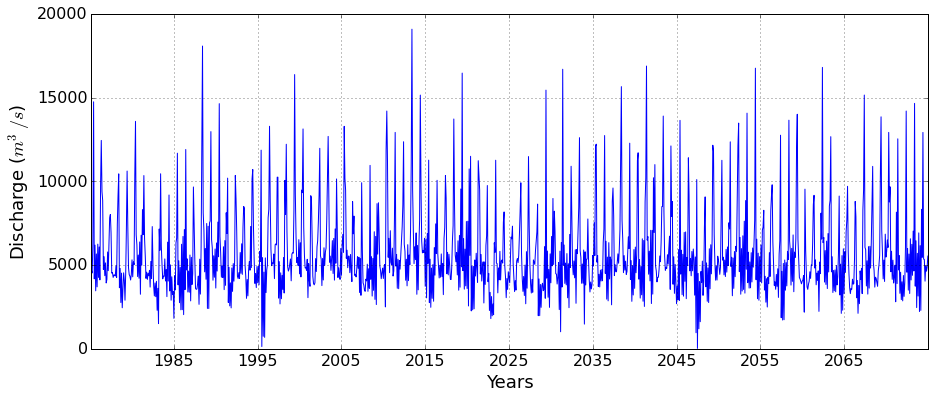

In [20]:
# Repeat Thomas-Fiering 1200 time steps:
#Define an array of 1200 elements
#sim_100 = np.arange(100)

# Define the period (100 years = 1200 months time steps)
period = pd.date_range('Jan-1975', periods=1200, freq='M')
sim_100 = thomas_fiering(q, q_init, 12, period)
#print(sim_100)

# plot the data
plt.figure(figsize=(15,6)); plt.hold(True)
plt.plot(sim_100.index, sim_100, c='b')
#plt.plot(simq.index, simq.discharge, c='r', label='simulated')
plt.xlabel('Years',fontsize =18)
plt.ylabel('Discharge ($m^3/s$)',fontsize =18)
plt.grid(True)

Calculating the different statistics for 100 years simulated data

In [21]:
sim=pd.DataFrame(sim_100['discharge'])
mean_100 = pd.DataFrame(sim.mean().round(2))
std_100 = pd.DataFrame(sim.std().round(2))
median_100 =pd.DataFrame(sim.median().round(2))
stats_100= (pd.concat([mean_100, std_100,median_100], axis =1))
my_columns = ["mean", "std", "median"]
stats_100.columns = my_columns
stats_100


,mean,std,median
discharge,5685.43,2622.74,5085.56


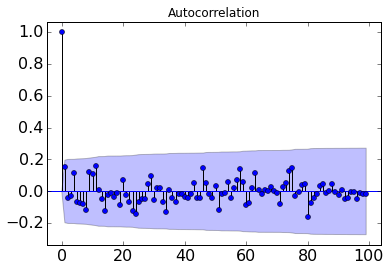

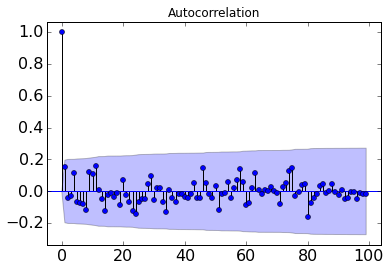

In [30]:
plot_acf(sim_yearly)

#### Calculating the yearly sum for 100 years simulated data 

In [29]:
sim_yearly = sim_100.groupby(sim_100.index.year).sum()

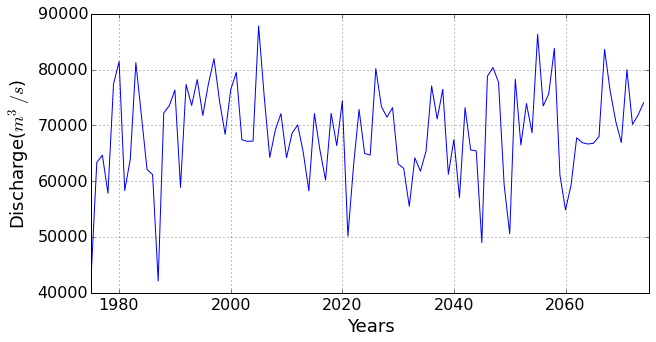

In [40]:
# plotting 100 years simulated data
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(sim_yearly.index,sim_yearly)
plt.grid()
plt.ylabel('Discharge($m^3/s$)', fontsize =18)
ax.set_xlim([1975 ,2075])
plt.xlabel('Years',fontsize=18)
plt.show()